Esse desafio faz parte do curso "Formação cientista de dados" do Prof Fernando Amaral, onde ele disponibiliza um arquivo de dados e o desafio, atrávez disso devemos resolver em forma de script.
Nesse o problema proposto foi:

Com o arquivo "dados.csv que contém informações de municipios, código, PIB, Valor empenho devemos colocar em forma de script.
 
 

  1 - Empenho em diárias em municípios gaúchos e PIB do municipio
  
 
  2 - Executar o processo de análise de dados exploratória para conhecimento e entendimento desses dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import numpy as np
import seaborn as snr

In [2]:
dados_municipios = pd.read_csv("dados.csv", sep=";")
dados_municipios.head(187)

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


Comceçando com a análise exploratória para tratamento dos dados

In [3]:
dados_municipios.isnull().sum() # Procurando possiveis valores nulos

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

As coluna Municipio, não pode ter duplicações, então vamos verificar se existem duplicações nas mesmas

In [4]:
dados = dados_municipios.CODIGO.value_counts()
dados.head(10)

378    4
372    4
259    4
141    4
380    4
197    1
28     1
405    1
232    1
407    1
Name: CODIGO, dtype: int64

In [5]:
dados = dados_municipios.MUNICIPIO.value_counts()
dados.head(15)

SANTA VITORIA DO PALMAR      2
MATO LEITAO                  2
NOVA BOA VISTA               2
SANTO ANTONIO DO PLANALTO    2
TAQUARA                      2
DOUTOR MAURICIO CARDOSO      2
MONTE ALEGRE DOS CAMPOS      2
CERRO BRANCO                 2
SANTO ANTONIO DAS MISSOES    2
MULITERNO                    2
SANTANA DO LIVRAMENTO        1
BARRA DO RIBEIRO             1
SAO JOAO DO POLESINE         1
VICTOR GRAEFF                1
SAO JOSE DO INHACORA         1
Name: MUNICIPIO, dtype: int64

Acima consiguimos encontrar duplicações na coluna municipio, sendo duplicado 2 vezes.
Vamos remover as duplicações pela coluna MUNICIPIOS.

In [6]:
dados_municipios.drop_duplicates(subset=['MUNICIPIO'], inplace = True)

In [7]:
dados_municipios # checando se foi removido as duplicidades

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
180,372,SANTA VITORIA DO PALMAR,17213.98,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


Com as duplicidades removidas podemos partir para as análises, elas serão simples como por exemplo qual o municipio com maior PIB e qual o maior Valor Empenho etc.

In [8]:
media_pib = dados_municipios.PIB.mean()
print(f'A média do PIB dos Municipios é de {media_pib:,.2f}')

A média do PIB dos Municipios é de 19,767.52


Abaixo veremos qual o Maior e Menor valor de PIB

In [25]:
dados_municipios.max()

CODIGO                       496
MUNICIPIO       VILA NOVA DO SUL
PIB                    223848.22
VALOREMPENHO          1442759.82
dtype: object

In [10]:
dados_municipios.min()

CODIGO                1
MUNICIPIO         AGUDO
PIB             8236.63
VALOREMPENHO     172.13
dtype: object

Text(0, 0.5, 'Valor de Empenho')

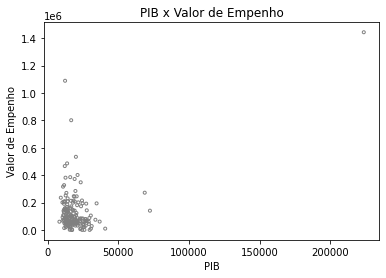

In [12]:
# Como se distribui o Valor de empenho em relação ao PIB
plt.scatter(dados_municipios.PIB, dados_municipios.VALOREMPENHO, color = 'gray', facecolors = 'none', marker = '.')
plt.title('PIB x Valor de Empenho')
plt.xlabel('PIB')
plt.ylabel('Valor de Empenho')

In [13]:
maiores_pib = dados_municipios.nlargest(10, 'PIB')

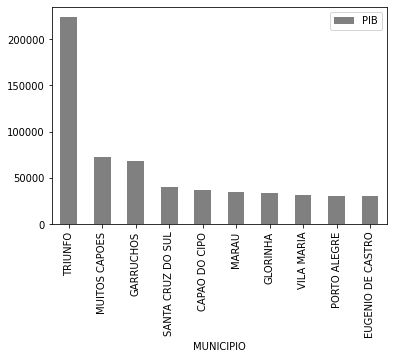

In [14]:
maiores_pib.plot.bar(x='MUNICIPIO', y= 'PIB', color = 'gray')

 Acima podemos ver os 10 Municipios com maiores PIB, e o municipio de Triunfo se destaca entre eles passando até mesmo a capital Porto Alegre e qual é o Valor de empenho desses mesmo 10 municipios? veremos abaixo

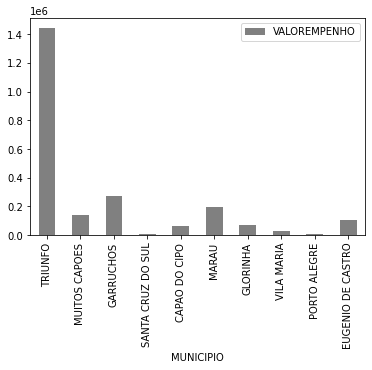

In [15]:
maiores_pib.plot.bar(x='MUNICIPIO', y='VALOREMPENHO', color ='gray')

Vamos ver os 10 municipios com menor PIB e menor Valor de Empenho

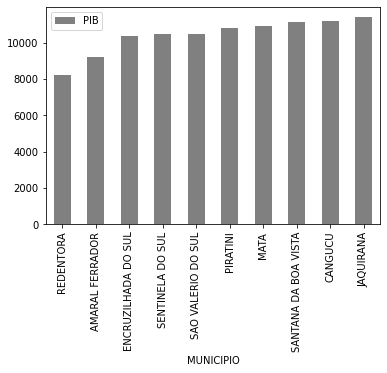

In [16]:
menores_pib = dados_municipios.nsmallest(10, 'PIB')
menores_pib.plot.bar(x='MUNICIPIO', y= 'PIB', color = 'gray')

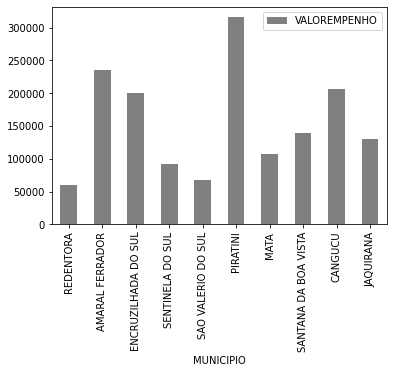

In [20]:
menores_pib.plot.bar(x='MUNICIPIO', y= 'VALOREMPENHO', color = 'gray')

Como podemos ver não é quem tem o maior PIB que vai ter o maior Valor de Empenho, então vamos visualizar os maiores e menores valores de empenho.

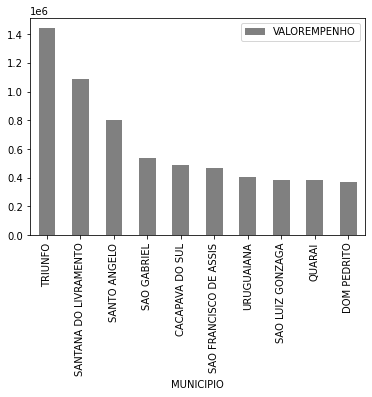

In [21]:
maiores_empenho = dados_municipios.nlargest(10, 'VALOREMPENHO')
maiores_empenho.plot.bar(x='MUNICIPIO', y= 'VALOREMPENHO', color = 'gray')

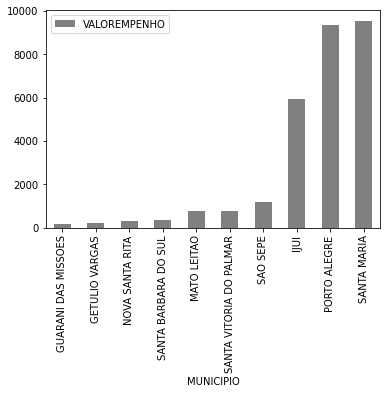

In [23]:
menores_empenho = dados_municipios.nsmallest(10, 'VALOREMPENHO')
menores_empenho.plot.bar(x='MUNICIPIO', y= 'VALOREMPENHO', color = 'gray')